In [1]:
%load_ext autoreload
%autoreload 2

import mt_utils
from neurolib.models.thalamocortical import ThalamocorticalModel
from neurolib.models.multimodel import MultiModel
from mt_utils.jaycay.aln_thalamus import ALNThalamusMiniNetwork
from mt_utils.parameters.jaycay_params import FIG10_PARAMS, FIG10_OU_MU

duration = 20000
spinup = 0

# ======== MULTIMODEL ==========
FIG10_OU_MU = FIG10_OU_MU["right_short"]
PARAMS = {**FIG10_PARAMS, **FIG10_OU_MU} 

# Create model
model_multi = MultiModel(
    ALNThalamusMiniNetwork(
        np.array([[0.0, 0.12], [1.2, 0.0]]),
        np.array([[0.0, 13], [13, 0.0]]),
    )   
)

for key in PARAMS:
    model_multi.params[key] = PARAMS[key]
model_multi.params["duration"] = duration

# ========== NATIVE ============
model_native = ThalamocorticalModel()
model_native.params["duration"] = duration + spinup

In [2]:
# IMPORTS FOR PLOTTING
import matplotlib.pyplot as plt
# Set plot size
width = 80
height = 16
plt.rcParams['figure.figsize'] = [width, height]

from mt_utils.mattias_utils import plotModels, convertMultimodelOutputs

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
from mt_utils.analysis import evaluate_results, EVALS_STANDARD
import pandas as pd

# g_LK_t: 0.0         g_LK_r: 0.0

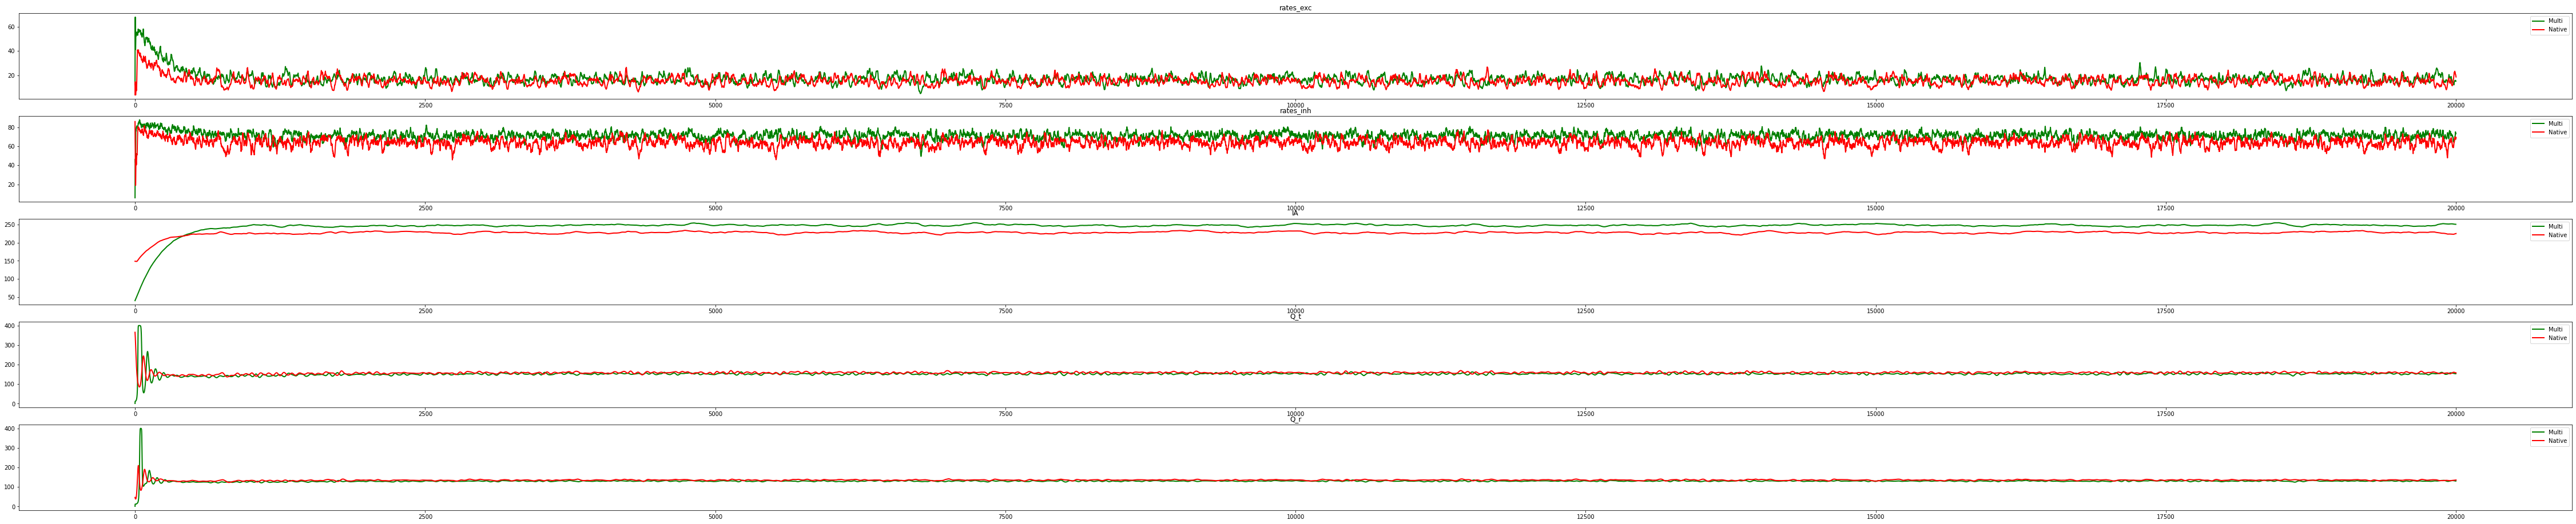

aln_exc_max	 native: 0.04091463076029642	 multi: 0.06799026115823478
aln_exc_diff	 native: 0.037218129221563215	 multi: 0.06315993881254478
thlm_tcr_max	 native: 0.3654685444888729	 multi: 0.399935908007222
thlm_tcr_diff	 native: 0.2799384944442712	 multi: 0.39873631544673843





# g_LK_t: 0.0         g_LK_r: 0.04

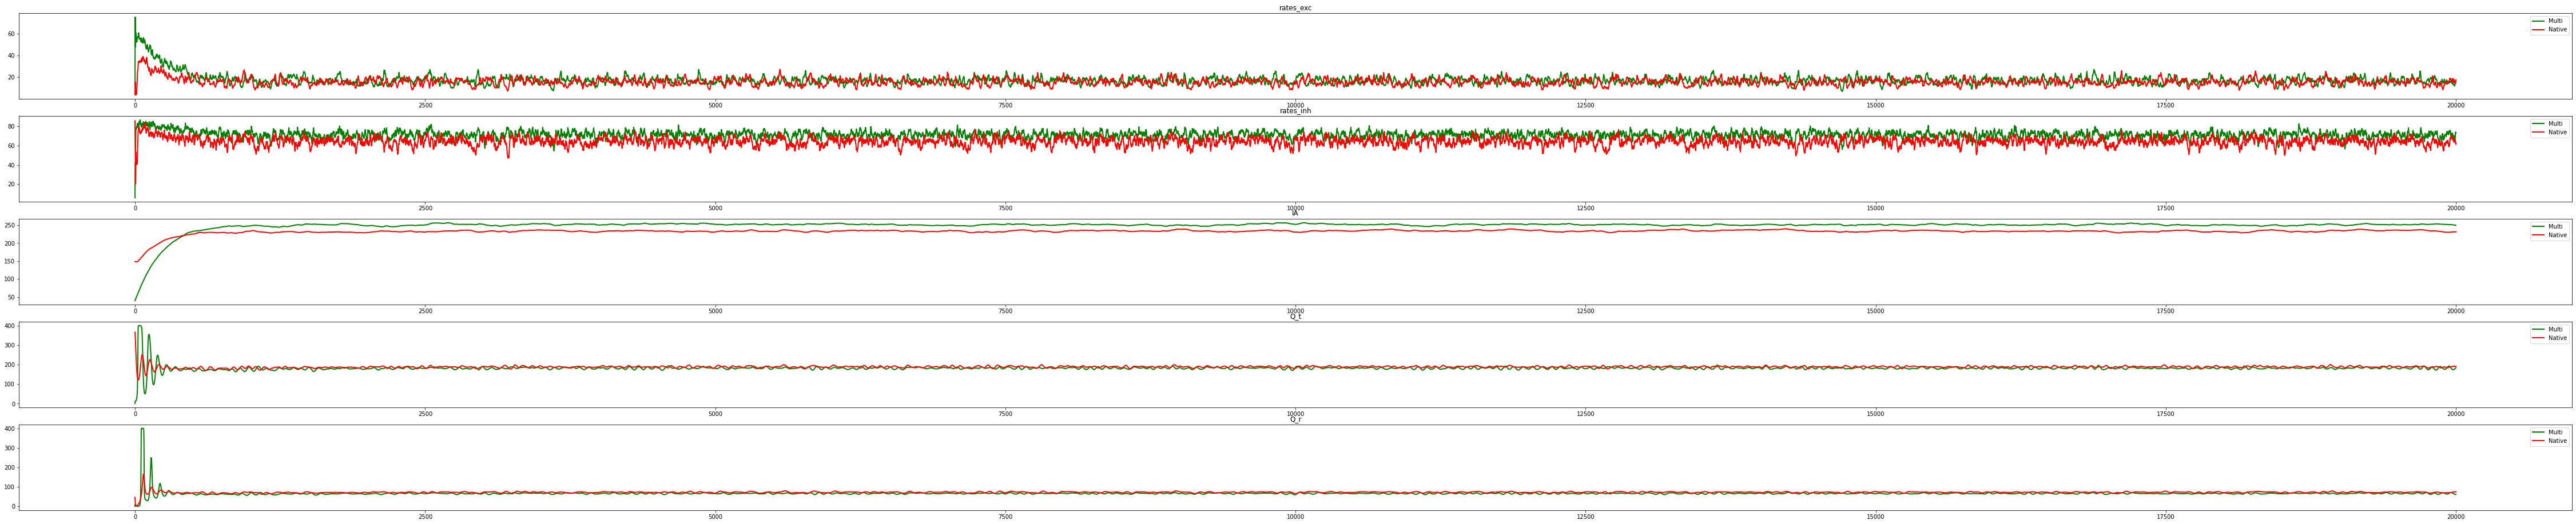

aln_exc_max	 native: 0.03905073352654641	 multi: 0.07552239078635473
aln_exc_diff	 native: 0.035391089716188706	 multi: 0.06853178459861878
thlm_tcr_max	 native: 0.3654685444888729	 multi: 0.39995541548394203
thlm_tcr_diff	 native: 0.24447698997617362	 multi: 0.39875582292345846





# g_LK_t: 0.0         g_LK_r: 0.08

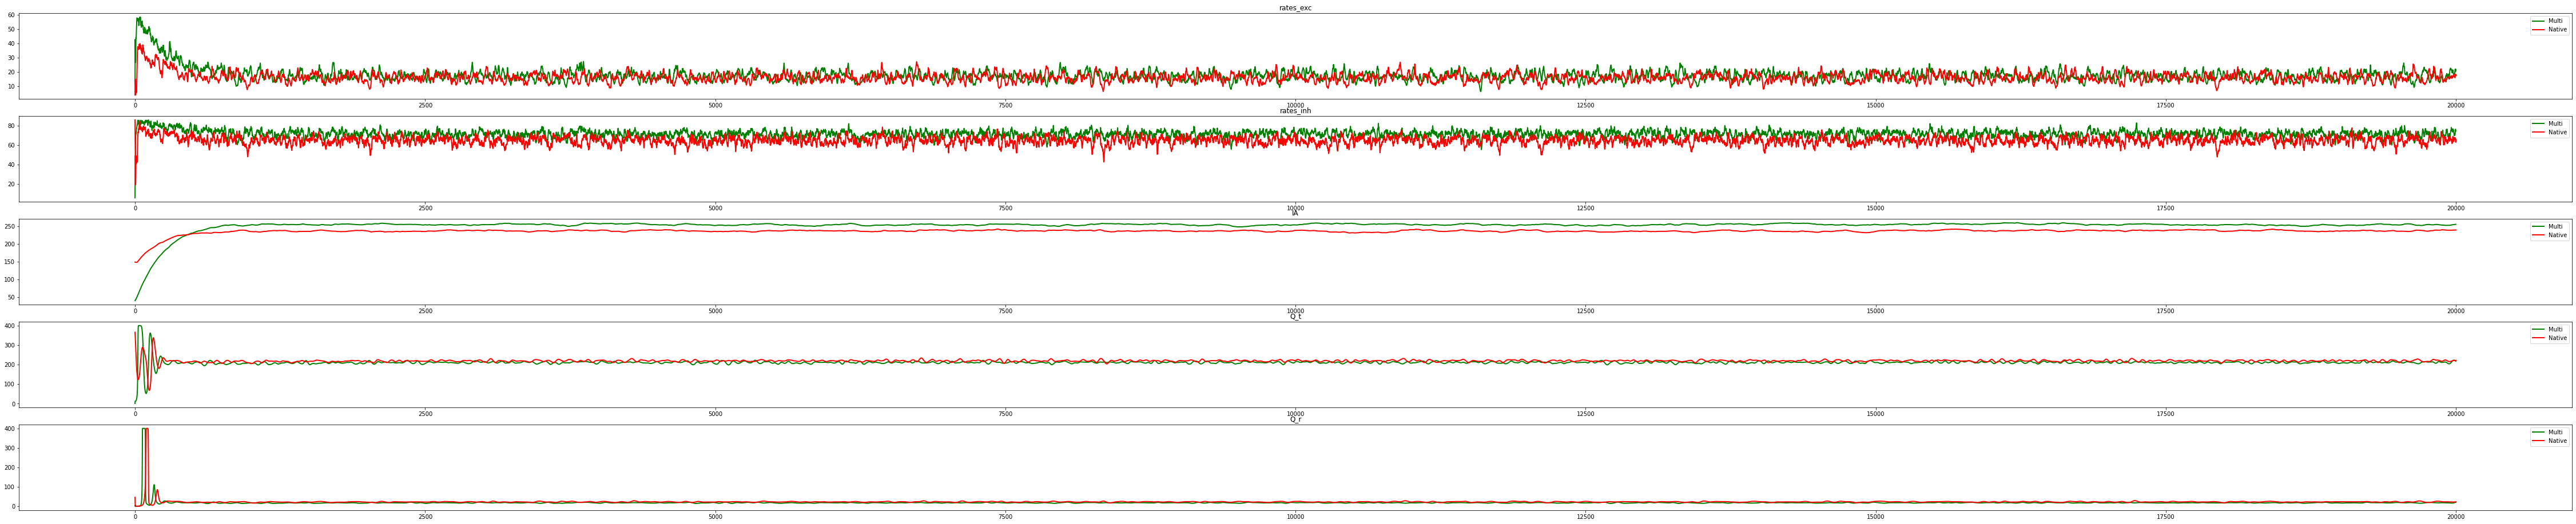

aln_exc_max	 native: 0.03976960635573073	 multi: 0.058430021541019325
aln_exc_diff	 native: 0.03599683650317625	 multi: 0.052289632109088505
thlm_tcr_max	 native: 0.3654685444888729	 multi: 0.3999524295765003
thlm_tcr_diff	 native: 0.29744819481692863	 multi: 0.3987528370160167





# g_LK_t: 0.04         g_LK_r: 0.0

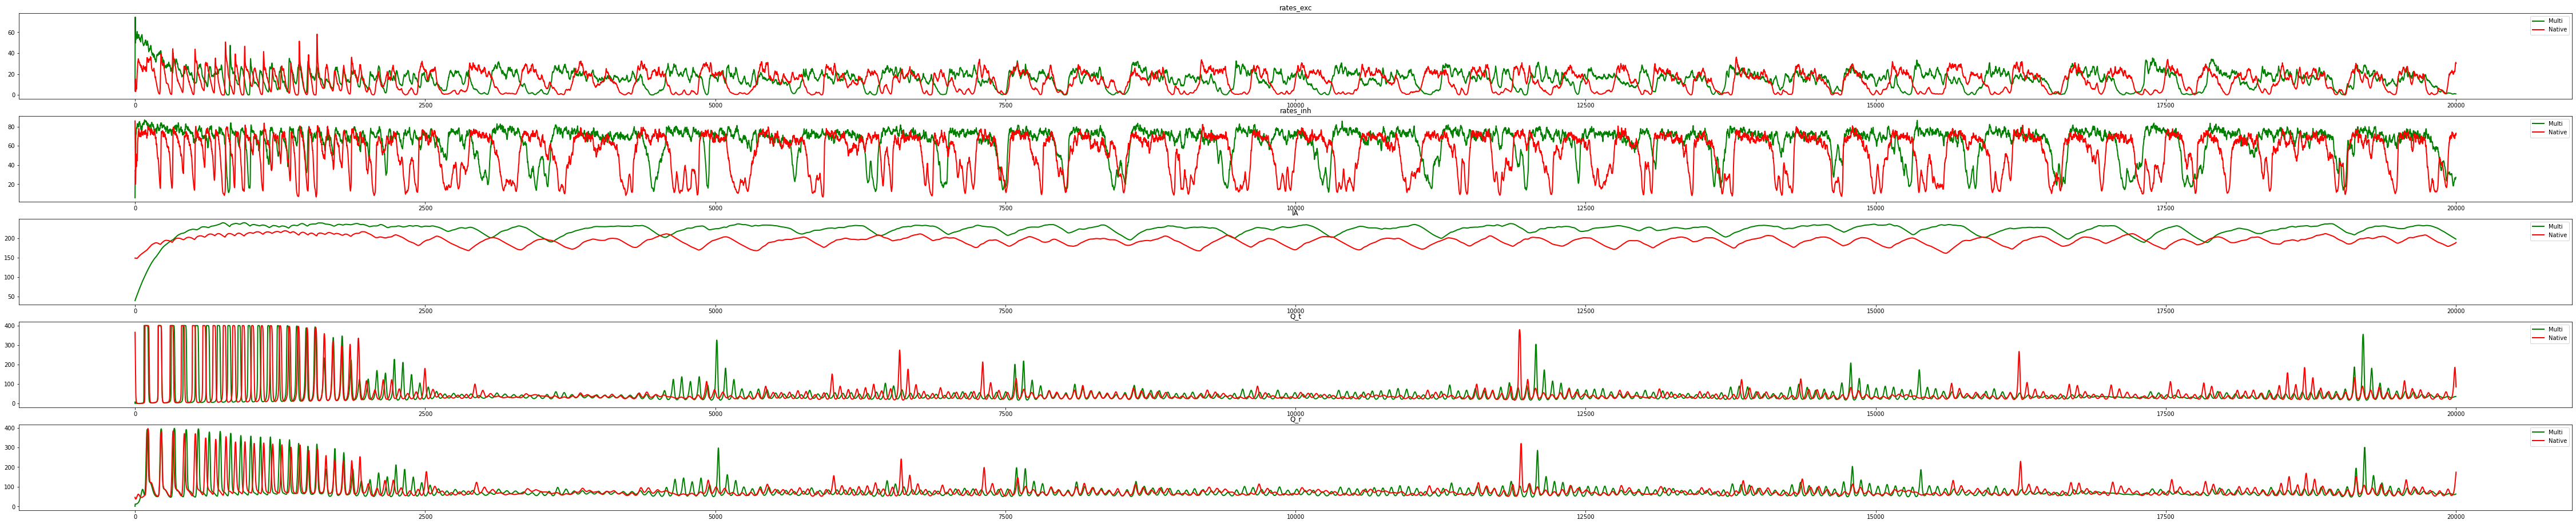

aln_exc_max	 native: 0.05814847675684827	 multi: 0.07447980282925419
aln_exc_diff	 native: 0.058120605478983796	 multi: 0.07443439699628414
thlm_tcr_max	 native: 0.4	 multi: 0.3999999999999998
thlm_tcr_diff	 native: 0.3993833750066014	 multi: 0.39953115590657223





# g_LK_t: 0.04         g_LK_r: 0.04

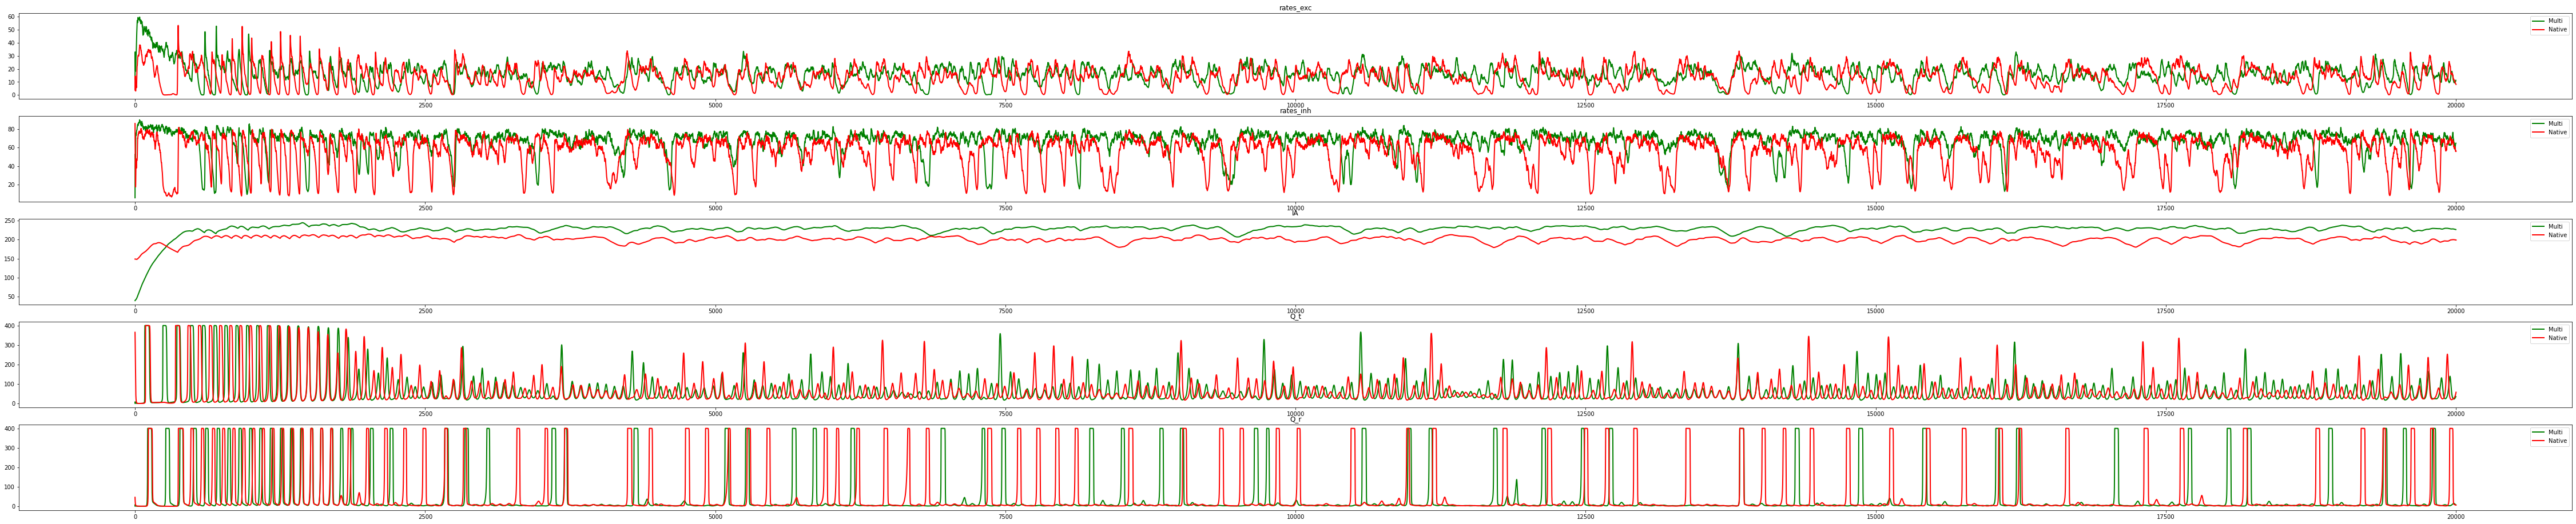

aln_exc_max	 native: 0.053249033250570635	 multi: 0.059625471274609376
aln_exc_diff	 native: 0.053214196402082435	 multi: 0.05957690576320292
thlm_tcr_max	 native: 0.4	 multi: 0.3999999999999998
thlm_tcr_diff	 native: 0.3995408370338938	 multi: 0.39956604154406605





# g_LK_t: 0.04         g_LK_r: 0.08

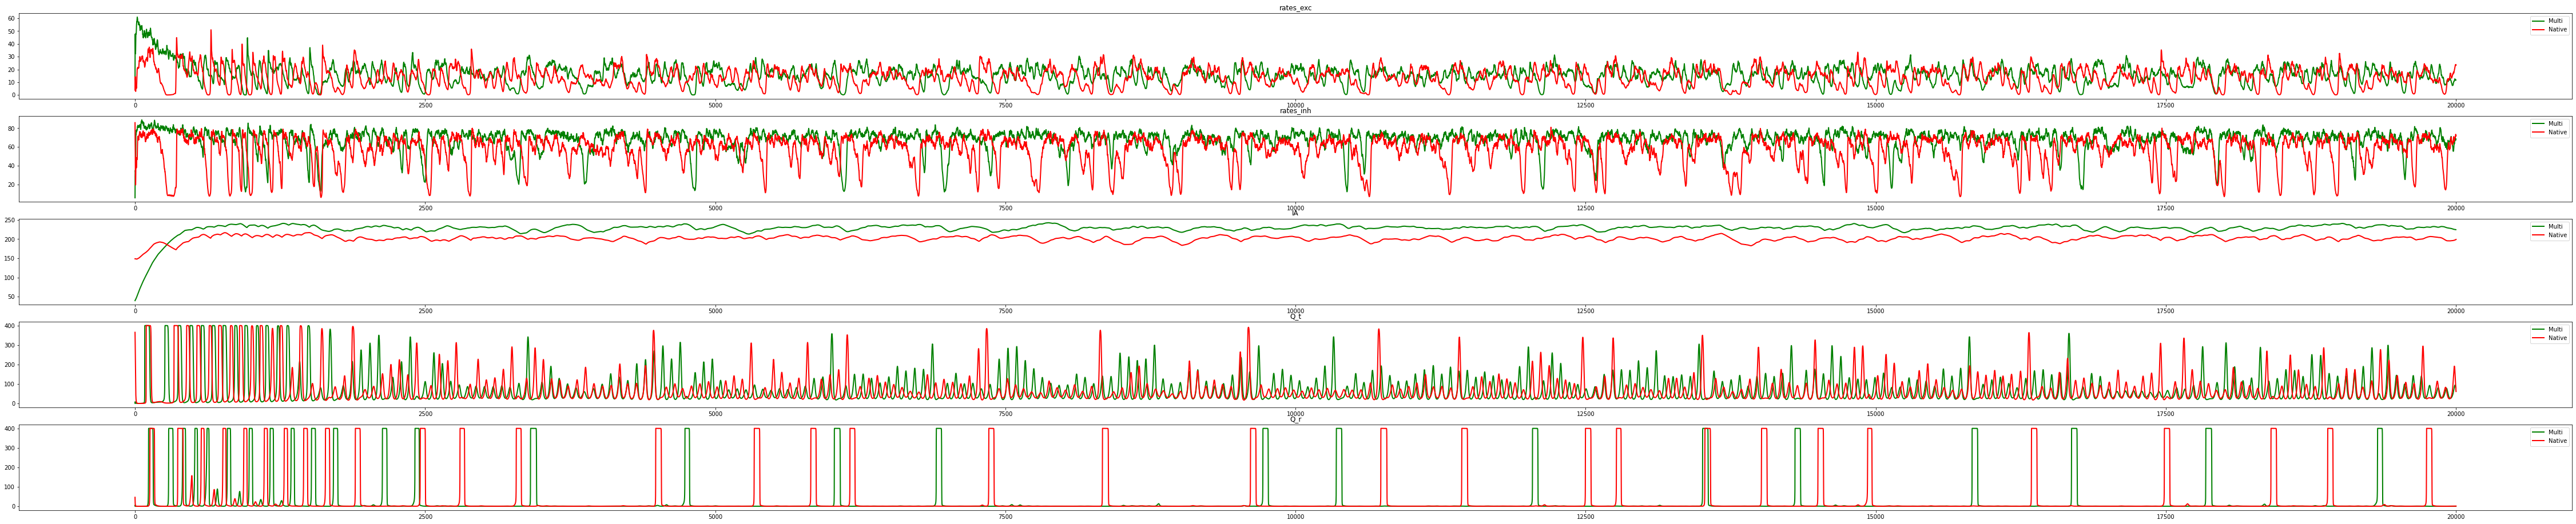

aln_exc_max	 native: 0.05103745019885632	 multi: 0.06101009723875649
aln_exc_diff	 native: 0.051019165121834964	 multi: 0.06097303653874808
thlm_tcr_max	 native: 0.4	 multi: 0.3999999999999998
thlm_tcr_diff	 native: 0.3995552875336143	 multi: 0.3995717369708193





# g_LK_t: 0.08         g_LK_r: 0.0

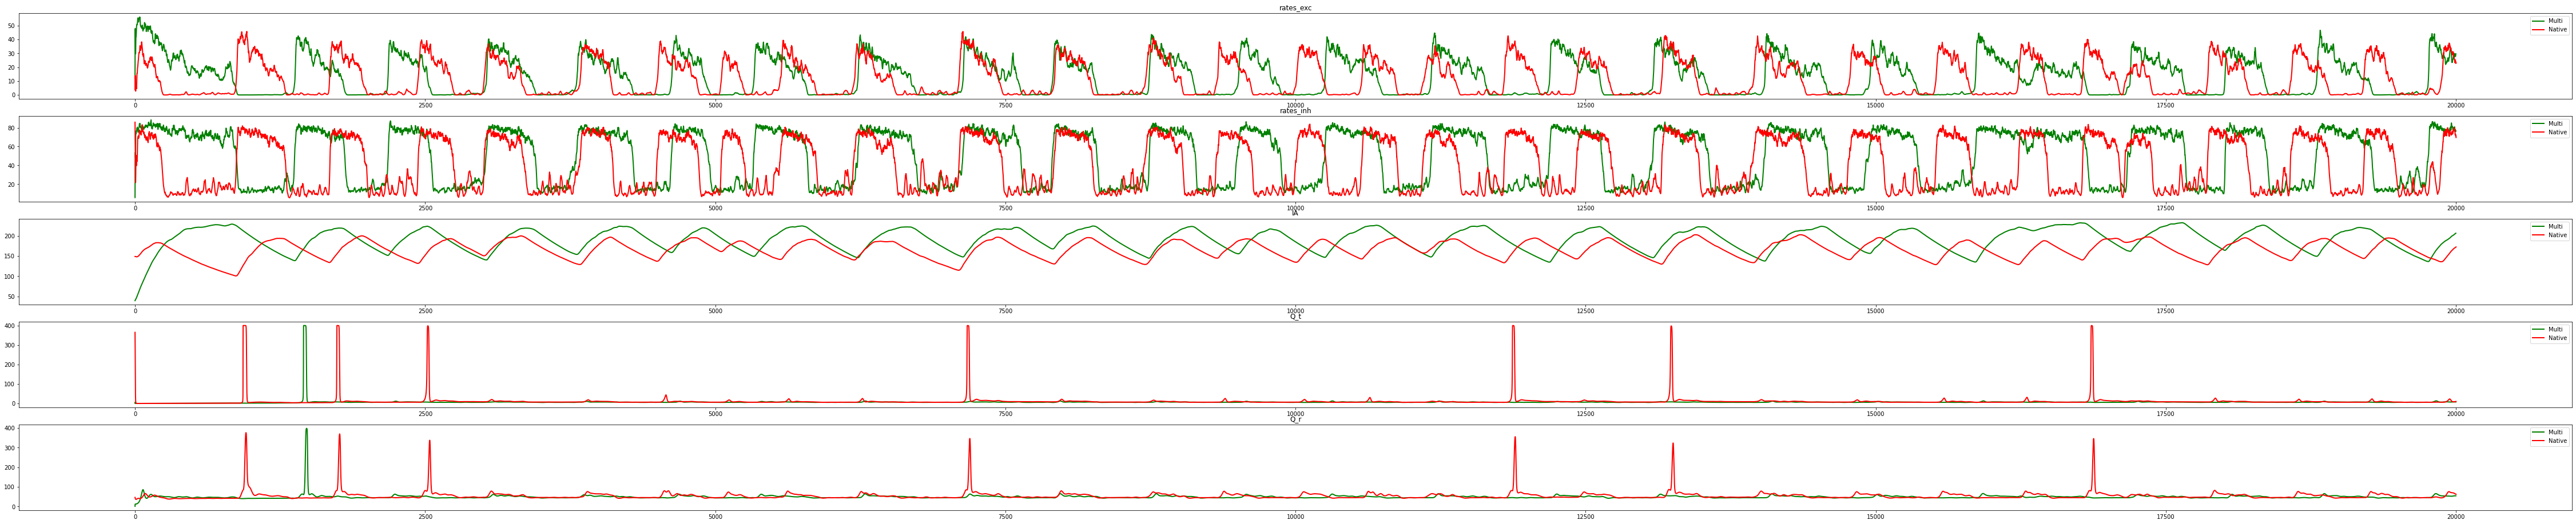

aln_exc_max	 native: 0.04580602023394121	 multi: 0.0562149283467172
aln_exc_diff	 native: 0.04579973954193462	 multi: 0.05621208620518148
thlm_tcr_max	 native: 0.3999999999999888	 multi: 0.39999999956040677
thlm_tcr_diff	 native: 0.39991593792736596	 multi: 0.3999246464143999





In [ ]:
evals = ['aln_exc_max', 'aln_exc_diff', 'thlm_tcr_max', 'thlm_tcr_diff']
#evals = ['aln_exc_max', 'aln_exc_diff', 'aln_spectrum', 'thlm_sps', 'thlm_tcr_max', 'thlm_tcr_diff', 'thlm_spectrum']
# evals = EVALS_STANDARD


# CHANGE THIS CELL
param1_name_multi = "ALNThlmNet.THLMnode_1.TCR_0.g_LK"
param1_name_native = "g_LK_t"
param1_vals = np.linspace(0, 0.08, 3)

param2_name_multi = "ALNThlmNet.THLMnode_1.TRN_1.g_LK"
param2_name_native = "g_LK_r"
param2_vals = np.linspace(0, 0.08, 3)

results_list_native = []
results_list_multi = []

for param1_val in param1_vals:
    model_multi.params[param1_name_multi] = param1_val
    model_native.params[param1_name_native] = param1_val
    for param2_val in param2_vals:
        # Set parameters
        model_multi.params[param2_name_multi] = param2_val
        model_native.params[param2_name_native] = param2_val
        
        # Run models
        model_multi.run()
        model_native.run()
        
        # Convert to same format
        outputs_multi = convertMultimodelOutputs(model_multi.outputs)
        
        # Plot
        printmd(f"# {param1_name_native}: {param1_val}         {param2_name_native}: {param2_val}")
        plotModels([outputs_multi, model_native], ["Multi", "Native"] )
        plt.show()
        
        # Eval
        aln_exc_native = pd.Series(model_native["rates_exc"][0,:] / 1000, index=model_native['t']/1000)
        aln_exc_native.index.name = 'time'
        thal_exc_native = pd.Series(model_native["Q_t"][0,:] / 1000, index=model_native['t']/1000)
        thal_exc_native.index.name = 'time'
        eval_native = evaluate_results(aln_exc_native, thal_exc_native, evals)

        aln_exc_multi = pd.Series(model_multi["r_mean_EXC"][0], index=model_multi["t"])
        aln_exc_multi.index.name = 'time'
        thal_exc_multi = pd.Series(model_multi["r_mean_EXC"][1], index=model_multi["t"])
        thal_exc_multi.index.name = 'time'
        eval_multi = evaluate_results(aln_exc_multi, thal_exc_multi, evals)
        
        results_list_native.append({param1_name_native: param1_val, param2_name_native: param2_val, **eval_native})
        results_list_multi.append({param1_name_native: param1_val, param2_name_native: param2_val, **eval_multi}) 
       
        # Print evals
        for evaluation in evals:
            print(f"{evaluation}\t native: {eval_native[evaluation]}\t multi: {eval_multi[evaluation]}")
        
        print("\n"*2)

pd_own_native = pd.DataFrame(results_list_native)
pd_own_multi = pd.DataFrame(results_list_multi)